# Homework 6

## Your Name Here (or your names here if you are pair programming)

## Logistic Regression without using any libraries. 

In [ ]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [ ]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 (4 points)
We want to use logistic regerssion to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement logistic regression model ***without*** using any libs than imported above. You must do it manually.

* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher/lower. 
* Visualize your costs.
* No need to add an y-intercept in this task. 


cost after  0 iteration is :  0.6931471805599454
cost after  10 iteration is :  0.6931382433277024
cost after  20 iteration is :  0.6931293238622771
cost after  30 iteration is :  0.6931204221282654
cost after  40 iteration is :  0.6931115380903338
cost after  50 iteration is :  0.6931026717132184
cost after  60 iteration is :  0.6930938229617257
cost after  70 iteration is :  0.6930849918007317
cost after  80 iteration is :  0.6930761781951823
cost after  90 iteration is :  0.6930673821100928


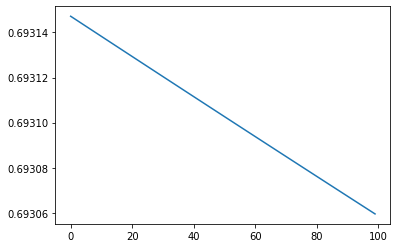

In [145]:
feature_cols = ['Age', 'Sex', 'Chol']
test = heart_df.sample(int(len(heart_df) * 0.20))
train = heart_df.drop(test.index)


X_train, y_train = train[feature_cols], train['Target'].replace({'No':0,'Yes':1}).to_numpy()
X_test, y_test = test[feature_cols], test['Target'].replace({'No':0,'Yes':1}).to_numpy()

X_train = X_train.T
Y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = y_test.reshape(1, X_test.shape[1])


def normalize(X, axis=0):
    return (X - np.mean(X, axis=axis)) / np.std(X, axis=axis)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    W = np.zeros((n,1))
    B = 0
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        # GD
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        # keeps track of cost function
        cost_list.append(cost)
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

X_train = normalize(X_train)
iterations = 100
learning_rate = 0.0001
W, B, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations)
plt.plot(np.arange(iterations), cost_list)
plt.show()

# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your logistic regression implementaion. 
Print the results. 

You may use equations shown in lecture/slides/examples.

In [146]:
# prediction function to test regression model
def predict(W, X):
    Z = np.dot(W.T, X) + B
    p = sigmoid(Z) >= 0.4
    return p.astype(int)
predictions = predict(W, X_test)
correct = np.sum(predictions == y_test)

negative = 0.0
positive = 1.0
# variables for true positives/negatives and false positives/negatives
tp = int(np.sum(np.logical_and(predictions == positive, y_test == positive)))
tn = int(np.sum(np.logical_and(predictions == negative, y_test == negative)))
fp = int(np.sum(np.logical_and(predictions == positive, y_test == negative)))
fn = int(np.sum(np.logical_and(predictions == negative, y_test == positive)))

# calculates scores
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)

# prints scores
print("Accuracy is: ", accuracy)
print("Precision is: ", precision)
print("Recall is: ", recall)
print("F1 Score is: ", 2*(precision * recall)/(precision + recall))

Accuracy is:  0.48333333333333334
Precision is:  0.48333333333333334
Recall is:  1.0
F1 Score is:  0.6516853932584269


# Task 3 - (4 points)


Add y-intercept and repeat the above 2 tasks. Do you see any differences after adding the y-intercept? 


Adding Y-Intercept increases the costs of the GD implementation.

cost after  0 iteration is :  5.473296427706332
cost after  10 iteration is :  5.472101719742577
cost after  20 iteration is :  5.470907012213191
cost after  30 iteration is :  5.469712305118196
cost after  40 iteration is :  5.468517598458587
cost after  50 iteration is :  5.467322892235624
cost after  60 iteration is :  5.466128186450248
cost after  70 iteration is :  5.464933481102871
cost after  80 iteration is :  5.463738776194918
cost after  90 iteration is :  5.462544071727534


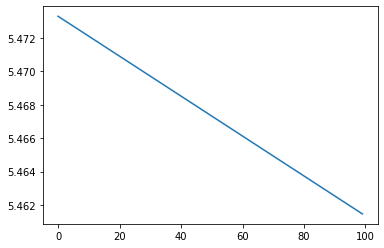

Accuracy is:  0.48333333333333334
Precision is:  0.48333333333333334
Recall is:  1.0
F1 Score is:  0.6516853932584269


In [170]:
# Repeat 1st Step
def model(X, Y, learning_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]
    W = np.zeros((n,1))
    # Adding Y-Intercept
    B = 10
    cost_list = []
    for i in range(iterations):
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        # GD
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        # keeps track of cost function
        cost_list.append(cost)
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
    return W, B, cost_list

X_train = normalize(X_train)
iterations = 100
learning_rate = 0.0001
W, B, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations)
plt.plot(np.arange(iterations), cost_list)
plt.show()

# Repeat 2nd step
predictions = predict(W, X_test)
negative = 0.0
positive = 1.0
# variables for true positives/negatives and false positives/negatives
tp = int(np.sum(np.logical_and(predictions == positive, y_test == positive)))
tn = int(np.sum(np.logical_and(predictions == negative, y_test == negative)))
fp = int(np.sum(np.logical_and(predictions == positive, y_test == negative)))
fn = int(np.sum(np.logical_and(predictions == negative, y_test == positive)))
# calculates scores
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
# prints scores
print("Accuracy is: ", accuracy)
print("Precision is: ", precision)
print("Recall is: ", recall)
print("F1 Score is: ", 2*(precision * recall)/(precision + recall))

# Task 4 - Implement the Bold Driver   - (4 points)
In your GD implementation, add the bold driver idea to have a dynamic learning rate.

* Add a stop codition to stop the GD when the cost is not changing more than 0.001. (differences between two costs not more than 0.001, then stop)
* Can you stop earlier than 100 iterations? 




In [ ]:
# Add your code Here! 

# Task 5 - Implement the L2 norm regularization.  - (4 points)

Modify your Cost and gradient to implement the l2 norm regularization. 
Repreat the task 1 and 2 to check if your result is changing. 

* Use y-itercept. 
* Do max 100 iterations as before and report your accuracy, Precision, Recall and F1. 
* You can stop earlier when the cost is not changing than 0.001. 


**Optional:** you might want to use the bold driver. But you can do this task without the bold driver as well. 



In [ ]:
# Add your code Here! 